In [32]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [33]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [35]:
import torch.nn as nn

In [36]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [37]:
mynet = MyNeuralNet().to(device)

In [38]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.4153,  0.6279],
        [-0.6024, -0.4247],
        [ 0.0036,  0.4698],
        [ 0.4334, -0.2964],
        [-0.6706,  0.5400],
        [ 0.3962, -0.4309],
        [-0.4368, -0.3045],
        [-0.1637,  0.5470]], requires_grad=True)
Parameter containing:
tensor([ 0.3694,  0.6555, -0.0992, -0.5684, -0.0570, -0.2829,  0.4938,  0.1580],
       requires_grad=True)
Parameter containing:
tensor([[ 0.3081, -0.0216, -0.1705, -0.2314,  0.1169, -0.3520, -0.2707, -0.1326]],
       requires_grad=True)
Parameter containing:
tensor([-0.2615], requires_grad=True)


In [39]:
loss_func = nn.MSELoss()

In [40]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(86.1823, grad_fn=<MseLossBackward0>)


In [41]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [42]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

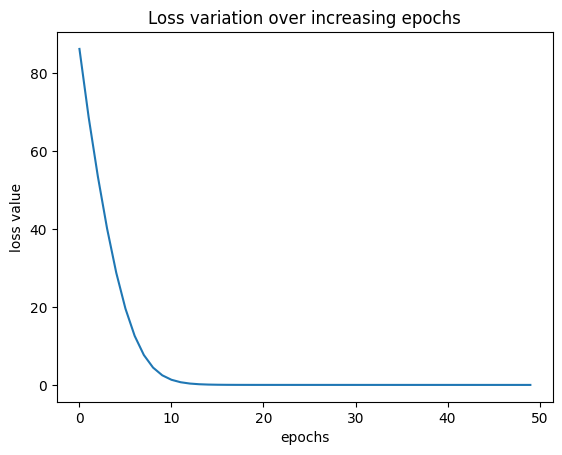

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.show()